In [12]:
N = ord("D") % 10 + 1
print(N)

9


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan, degrees
from sympy import symbols, Eq, linear_eq_to_matrix
from sympy.parsing.latex import parse_latex

In [14]:
lines = [
    r"8.3x_1 + 8.2x_2 = 134",
    r"-10.2x_1 + 15.2x_2 = 102",
    r"14.5x_1 - 7.3x_2  = 141"
]

labels = [
    "8.3x1 + 8.2x2 = 134",
    "-10.2x1 + 15.2x2 = 102",
    "14.5x1 - 7.3x2 = 141"
]

equations = [parse_latex(eq) for eq in lines]


variables = list(sorted(
    {sym for eq in equations for sym in eq.free_symbols},
    key=lambda s: str(s)
))

A, b = linear_eq_to_matrix(equations, variables)

lines_coefs = [
    (A[0, :][0], A[0, :][1], b[0, :][0]),
    (A[1, :][0], A[1, :][1], b[1, :][0]),
    (A[2, :][0], A[2, :][1], b[2, :][0])
]

print(A, b, lines_coefs)

Matrix([[8.30000000000000, 8.20000000000000], [-10.2000000000000, 15.2000000000000], [14.5000000000000, -7.30000000000000]]) Matrix([[134], [102], [141]]) [(8.30000000000000, 8.20000000000000, 134), (-10.2000000000000, 15.2000000000000, 102), (14.5000000000000, -7.30000000000000, 141)]


In [15]:
colors = ['#8B0000', '#2E8B57', '#800080']
linestyles = ['--', ':', '-.']

x = np.linspace(-100, 100, 400)

### 1) Знаходження точок перетину прямих

In [16]:
def line_intersection(line1, line2, tol=1e-12):
    b1, m1, g1 = line1
    b2, m2, g2 = line2

    A = np.array([[b1, m1],
                  [b2, m2]], dtype=float)
    
    G = np.array([g1, g2], dtype=float)

    det = np.linalg.det(A)

    if abs(det) < tol:
        # Parallel or coincident
        if np.allclose([b1, m1, g1], 
                       np.array([b2, m2, g2]) * (b1 / b2) 
                       if b2 != 0 else 
                       np.array([b2, m2, g2]) * (m1 / m2),
                       atol=tol):
            return "coincident"
        return None

    solution = np.linalg.solve(A, G)
    return tuple(solution)


pairs = [(0,1), (0,2), (1,2)]
intersections = [line_intersection(lines_coefs[line1], lines_coefs[line2]) for line1, line2 in pairs]


for i in range(3):
    line1, line2 = pairs[i]
    label1, label2 = labels[line1], labels[line2]
    print("Lines", label1, "and", label2, "intersect at point")
    print(intersections[i], end="\n\n")

Lines 8.3x1 + 8.2x2 = 134 and -10.2x1 + 15.2x2 = 102 intersect at point
(np.float64(5.721639656816015), np.float64(10.550047664442326))

Lines 8.3x1 + 8.2x2 = 134 and 14.5x1 - 7.3x2 = 141 intersect at point
(np.float64(11.89147027689565), np.float64(4.304975207532453))

Lines -10.2x1 + 15.2x2 = 102 and 14.5x1 - 7.3x2 = 141 intersect at point
(np.float64(19.787583938604907), np.float64(19.98903659037961))



### 2) 3 окремі графіки поруч

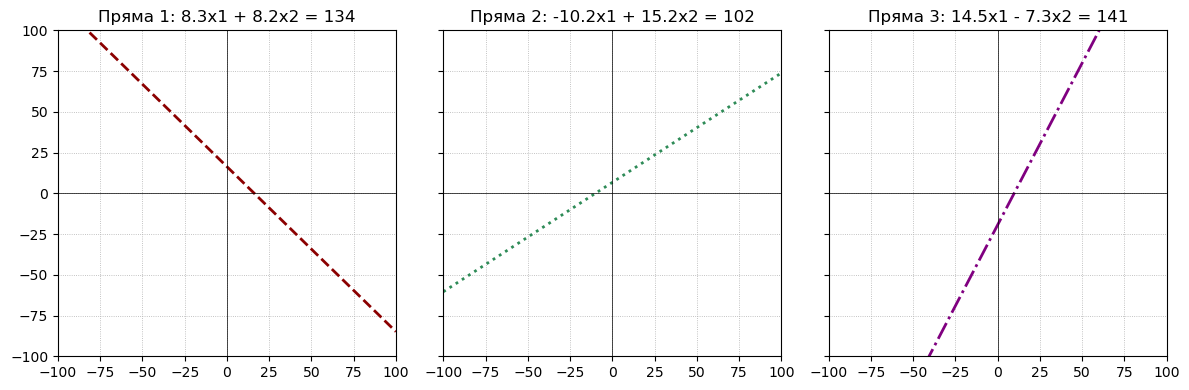

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, color, ls, idx in zip(axes, colors, linestyles, [0,1,2]):
    b, m, g = lines_coefs[idx]
    label = labels[idx]
    y_vals = -(b * x - g) / m

    ax.plot(x, y_vals, linestyle=ls, linewidth=2, color=color)
    ax.set_title(f"Пряма {idx+1}: {label}")
    ax.set_ylim(-100, 100)
    ax.set_xlim(-100, 100)
    ax.grid(True, linestyle=':', linewidth=0.6)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)


plt.tight_layout()

plt.savefig("all_lines.jpg")
plt.savefig("all_lines.png")
plt.savefig("all_lines.svg")

plt.show()

### 3) Всі лінії на одному рисунку + заповнення області трикутника

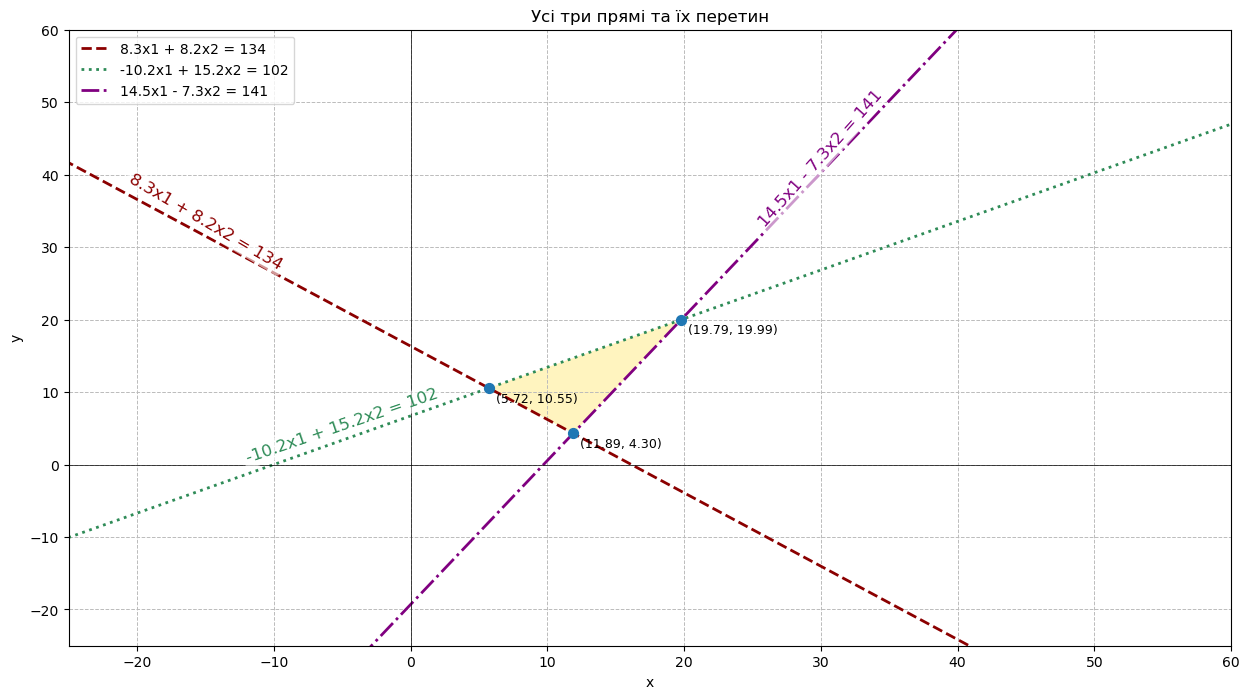

In [18]:

ffig2, ax2 = plt.subplots(figsize=(15, 8), dpi=100)

for idx, color, ls in zip([0, 1, 2], colors, linestyles):
    b, m, g = lines_coefs[idx]
    label = labels[idx]
    ax2.plot(x, -(b * x - g) / m, label=label, color=color, linestyle=ls, linewidth=2)

ax2.grid(True, color='#bbbbbb', linestyle='--', linewidth=0.7)

ax2.set_xlim(-25, 60)
ax2.set_ylim(-25, 60)

ax2.legend(loc='upper left')

intersections = np.array(intersections)
ax2.scatter(intersections[:,0], intersections[:,1], marker='o', s=50, zorder=5)

for (xi, yi), (i,j) in zip(intersections, pairs):
    ax2.annotate(f"({xi:.2f}, {yi:.2f})", xy=(xi, yi), xytext=(5, -10),
                 textcoords='offset points', fontsize=9)


for idx, color in zip([0, 1, 2], colors):
    b, m, g = lines_coefs[idx]
    label = labels[idx]
    
    x_pos = -15
    if idx == 1:
        x_pos = -5
    elif idx == 2:
        x_pos = 30
    y_pos = -(b * x_pos - g) / m + 2
    
    angle_deg = degrees(atan(-(b/m)))
    if angle_deg > 0:
        angle_deg -= 15
    if angle_deg < 0:
        angle_deg += 15
        
    ax2.text(x_pos, y_pos, label, color=color,
             fontsize=12, rotation=angle_deg, rotation_mode='anchor',
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6, edgecolor='none'))


centroid = intersections.mean(axis=0)

angles = np.arctan2(intersections[:,1] - centroid[1], intersections[:,0] - centroid[0])
order = np.argsort(angles)
triangle = intersections[order]


ax2.fill(triangle[:,0], triangle[:,1], alpha=0.25, facecolor='#FFD700', edgecolor='none', zorder=1)


ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Усі три прямі та їх перетин")
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)

plt.savefig("triangle.jpg")
plt.savefig("triangle.png")
plt.savefig("triangle.svg")

plt.show()
